In [1]:
import neptune.new as neptune
import matplotlib.pyplot as plt
from skimage.io import imread

Get the best `run-id`

In [2]:
project = neptune.get_project(name="common/Pytorch-ImageSegmentation-Unet")

# (neptune) find best run for given data version
best_run_df = project.fetch_runs_table(tag="best").to_pandas()
best_run_id = best_run_df["sys/id"].values[0]

https://app.neptune.ai/common/Pytorch-ImageSegmentation-Unet/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


Load the best run in `read-only` model

In [3]:
run = neptune.init(
        project="common/Pytorch-ImageSegmentation-Unet",
        tags=["finetune"],
        source_files=None,
        run=best_run_id,
        mode='read-only'
    )

https://app.neptune.ai/common/Pytorch-ImageSegmentation-Unet/e/PYTOR3-124
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


Fetch Train Loss for the run and plot it

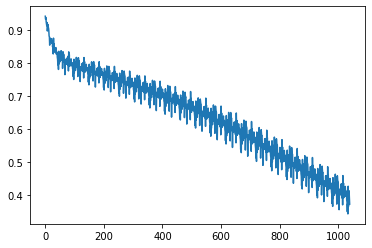

In [4]:
train_loss = run['train/metrics/train_dice_loss']
train_loss_df = train_loss.fetch_values()
plt.plot(train_loss_df.step, train_loss_df.value)

In [5]:
hyper_params = run['train/hyper_params']
print(hyper_params.fetch())

{'batch_size': 64, 'epochs': 20, 'lr': 0.0001}


Plot evolution of Model Prediction on a Validation Image

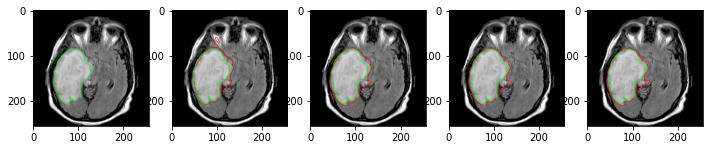

In [6]:
validation_pred_evolve_1 = run['train/validation_prediction_evolution/TCGA_CS_4944_20010208_9.tif']
download_dir = "valid_mask_evolution"
validation_pred_evolve_1.download(download_dir)

# plot only 1st 5
files = os.listdir(download_dir)[:5]
_, ax = plt.subplots(1, len(files), figsize=(12, 12))

for idx, img_file in enumerate(files):
    ax[idx].imshow(imread(download_dir + "/" + img_file))
